## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# https://docs.scipy.org/doc/scipy/reference/stats.html

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#check dtypes for any potential irregularities.
data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [3]:
# Checking the number of mice.
mouse_id_list = len(data['Mouse ID'].unique())
print(f'There are a total of {mouse_id_list} unique mouse IDs in the data.')

There are a total of 249 unique mouse IDs in the data.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_id = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(f'The duplicated mice ID by both Mouse ID and Timepoint is {duplicated_mouse_id}.')

The duplicated mice ID by both Mouse ID and Timepoint is ['g989'].


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_id_data = data[data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated_mouse_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data['Mouse ID'].isin(duplicated_mouse_id) == False]
clean_data.rename(columns = {'Age_months':"Age (months)"}, inplace = True)
clean_data

C:\Users\vellam1\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_id_list = len(clean_data['Mouse ID'].unique())
print(f'There are a total of {cleaned_mouse_id_list} unique mouse IDs in the data when duplicates are removed.\
\ni.e. there appears to be {mouse_id_list - cleaned_mouse_id_list} ID with duplicated data.')


There are a total of 248 unique mouse IDs in the data when duplicates are removed.
i.e. there appears to be 1 ID with duplicated data.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.




In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Create Calcs
regimen_summary = clean_data.groupby('Drug Regimen')
drug_mean = regimen_summary['Tumor Volume (mm3)'].mean()
drug_median = regimen_summary['Tumor Volume (mm3)'].median()
drug_var = regimen_summary['Tumor Volume (mm3)'].var()
drug_std = regimen_summary['Tumor Volume (mm3)'].std()
drug_sem = regimen_summary['Tumor Volume (mm3)'].sem()

#create DF
regimen_summary_stats = pd.DataFrame({'Mean':drug_mean,
                                     'Median':drug_median,
                                     'Variance':drug_var,
                                     'S.Dev.':drug_std,
                                     'SEM':drug_sem})

#formatting
pd.options.display.float_format = '{:.2f}'.format
regimen_summary_stats


,Mean,Median,Variance,S.Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
def bar_chart_pandas():
    bar_plot = clean_data['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3, figsize=(10,6))
    bar_plot.set_xlabel('Drug Regimen')
    bar_plot.set_ylabel('Number of Mice')
    bar_plot.set_title('Number of Mice for Each Treatment Regimen', fontweight = 'bold')
    bar_plot.grid(zorder=0)

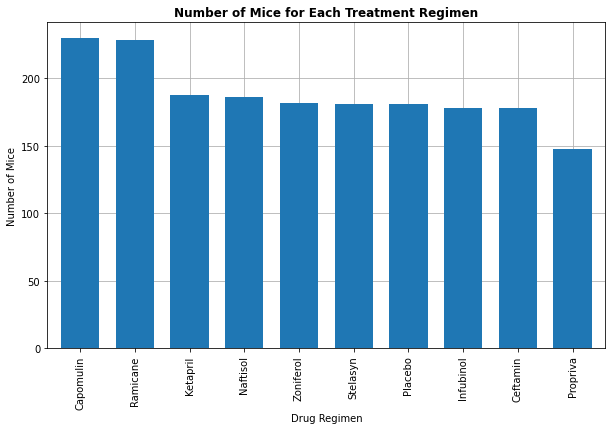

In [61]:
bar_chart_pandas()

In [74]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
def bar_chart_pyplot():
    y_axis = clean_data['Drug Regimen'].value_counts()
    x_axis = np.arange(len(y_axis))
    x_ticks = [x for x in x_axis]
    plt.figure(figsize=(10,6))
    plt.xlabel("Drug Regimen")
    plt.ylabel("Number of Mice")
    plt.xticks(x_ticks, y_axis.index.values, rotation = 90)
    plt.title('Number of Mice for Each Treatment Regimen', fontweight = 'bold')
    plt.grid(zorder = 0)
    plt.bar(x_axis, y_axis, width = 0.7, zorder = 3)
    plt.show()

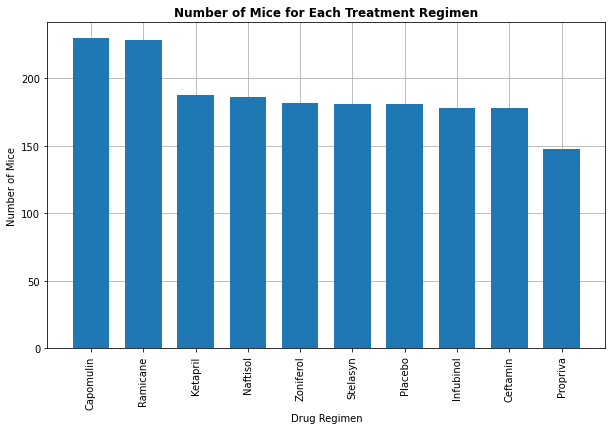

In [75]:
bar_chart_pyplot()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
def pie_chart_pandas():
    data = clean_data['Sex'].value_counts()
    pie_plot = data.plot.pie(autopct = '%1.1f%%', startangle = 90, figsize=(10,6))
    pie_plot.set_title('Gender Distribution of Mice', fontweight = 'bold')
    pie_plot.set_ylabel('') #hide y_label for matting

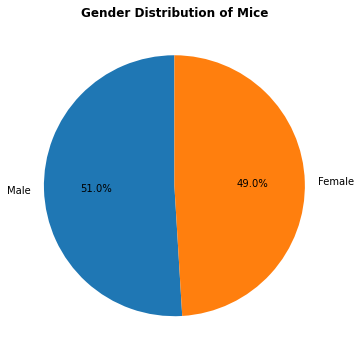

In [77]:
pie_chart_pandas()

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
def pie_chart_pyplot():
    data = clean_data['Sex'].value_counts()
    plt.figure(figsize=(10,6))
    plt.pie(data, labels = data.index.values, autopct = '%1.1f%%', startangle = 90)
    plt.title('Gender Distribution of Mice', fontweight = 'bold')


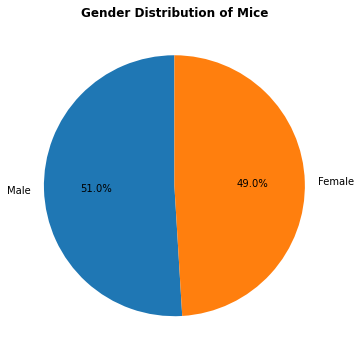

In [79]:
pie_chart_pyplot()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#as analysis is based on mouse id, group by mouse id and find max value corresponding to any particular mouse id, rename column to max_timepoint for merge later.

max_timepoint = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns = {'Timepoint':'max_timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge1 = pd.merge(clean_data, max_timepoint, on = 'Mouse ID')
merge1.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.00,0,45
1,k403,Ramicane,Male,21,16,5,38.83,0,45
2,k403,Ramicane,Male,21,16,10,35.01,1,45
3,k403,Ramicane,Male,21,16,15,34.22,1,45
4,k403,Ramicane,Male,21,16,20,33.00,1,45


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_results = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    #subset dfs that narrow down both Drug and Max Timepoint
    qob_df = merge1.loc[merge1['Drug Regimen'] == drug]
    tumor_volumes_df = qob_df.loc[qob_df['Timepoint'] == qob_df['max_timepoint']]
    
    #find tumor volume and append to results list
    tumour_volume = tumor_volumes_df['Tumor Volume (mm3)']
    drug_results.append(tumour_volume)
    
    #iqr calcs
    quartiles = tumour_volume.quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile = upper_quartile - lower_quartile
    
    #lower and upper bounds
    lower_bound = lower_quartile - (1.5 * inter_quartile)
    upper_bound = upper_quartile + (1.5 * inter_quartile)
    
    #outliers = above / below upper / lower bounds respectively
    outliers = (tumour_volume.loc[(tumor_volumes_df['Tumor Volume (mm3)'] >= upper_bound) |
                                 (tumor_volumes_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    
    #print statistical results per drug to illustrate any outliers (inc. formatting for cleanliness)
    print(f'The IQR for {drug}: {inter_quartile : ,.2f}\
    \nLower Bounds of {drug}: {lower_bound : ,.2f}\
    \nUpper Bounds of {drug}: {upper_bound : ,.2f}\
    \n# of outliers for {drug}: {outliers : ,.0f}\
    \n')
    
    
# drug_results provides 4 lists corresponding to the four specified drugs.
# drug_check = qob_df['Drug Regimen'].unique()
# drug_check

The IQR for Capomulin:  7.78    
Lower Bounds of Capomulin:  20.70    
Upper Bounds of Capomulin:  51.83    
# of outliers for Capomulin:  0    

The IQR for Ramicane:  9.10    
Lower Bounds of Ramicane:  17.91    
Upper Bounds of Ramicane:  54.31    
# of outliers for Ramicane:  0    

The IQR for Infubinol:  11.48    
Lower Bounds of Infubinol:  36.83    
Upper Bounds of Infubinol:  82.74    
# of outliers for Infubinol:  1    

The IQR for Ceftamin:  15.58    
Lower Bounds of Ceftamin:  25.36    
Upper Bounds of Ceftamin:  87.67    
# of outliers for Ceftamin:  0    



In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#ref document - https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

def box_plot():
    flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 10, markeredgecolor = 'black')
    plt.figure(figsize=(10,6))
    plt.boxplot(drug_results, flierprops = flierprops)
    plt.ylabel('Final Tumor Volume (mm3)')
    plt.xlabel('Drug')
    plt.xticks([1,2,3,4], labels=drugs)
    plt.title('Statistical Distribution of Final Tumor Volume by Drug', fontweight = 'bold')


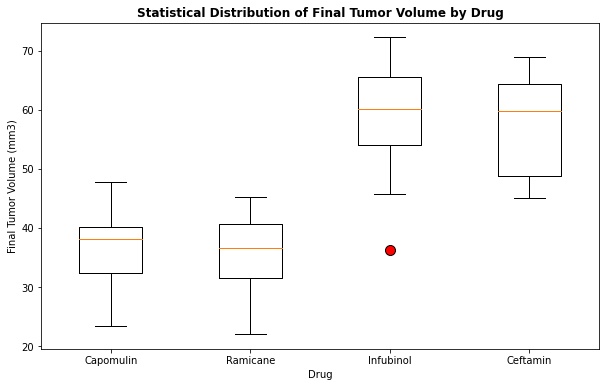

In [83]:
box_plot()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
